In [189]:
import matplotlib.pyplot as plt
import numpy as np
import math

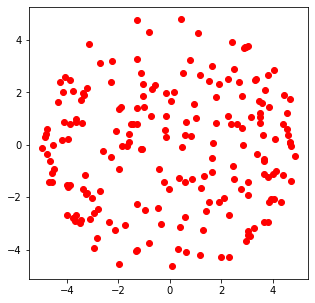

In [190]:
rc = 1
L = 10 * rc
num = 200
dot_list = []
status_list = []
for i in range(num):
    x = np.random.uniform(-L / 2.0, L / 2.0)
    y_max = ((L / 2.0) ** 2 - x ** 2) ** 0.5
    y = np.random.uniform(-y_max, y_max)
    dot_list.append(np.array((x * 1.0, y * 1.0)))
    status_list.append(np.array((x * 1.0, y * 1.0)))
plt.figure(figsize=(5, 5))
for x in dot_list:
    plt.scatter(x[0], x[1], c='red')
plt.show()

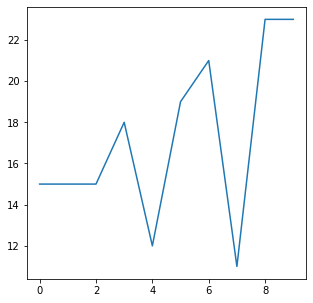

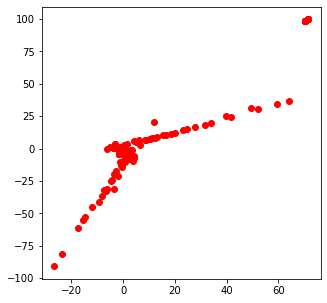

In [191]:
#Algorithm - 1 MWMS-S
alpha = 0.5
epsilon = 1 / num


def dst(dot1, dot2):
    return ((dot1[0] - dot2[0]) ** 2 + ((dot1[1] - dot2[1]) ** 2)) ** 0.5


#邻接矩阵
def getAdjMat(dot_list, rc, num):
    a_mat = np.zeros((num, num))
    for i, dot1 in enumerate(dot_list):
        for j, dot2 in enumerate(dot_list):
            if i == j: continue
            if dst(dot1, dot2) <= rc:
                a_mat[i][j] = 1
    return a_mat


#基元矩阵
def getMotifMat(adj_mat, num):
    m_mat = np.zeros((num, num))
    for i in range(num):
        for j in range(num):
            if adj_mat[i][j] == 1:
                for k in range(num):
                    if adj_mat[i][k] and adj_mat[j][k]:
                        m_mat[i][j] += 1
    return m_mat


# 获取邻居数量
def getNeighborIndex(adj_mat, num):
    nei_list = []
    for i in range(num):
        nei = []
        for j in range(num):
            if adj_mat[i][j]:
                nei.append(j)
        nei_list.append(nei)
    return nei_list


def updateStatus(nei_list, motif_mat, adj_mat, status_list):
    w_mat = (1 - alpha) * adj_mat + alpha * motif_mat
    d_list = []
    for i in range(num):
        d_sum = 0
        for j in range(num):
            if not motif_mat[i][j] == 0:
                d_sum += 1 / motif_mat[i][j]
        d_list.append(d_sum)
    for i, dot in enumerate(status_list):
        x_temp = np.array((0.0, 0.0))
        for nei in nei_list:
            for j in nei:
                if w_mat[i][j] and d_list[i] != 0:
                    x_temp = x_temp + (len(nei) + 1) * epsilon * (status_list[j] - status_list[i]) * (
                            1 / (d_list[i] * w_mat[i][j]))
        status_list[i] = x_temp + status_list[i]


motif_max_list = []
for t in range(10):
    alpha += 0.1
    status_list = dot_list.copy()
    motif_max = 0
    for i in range(200):
        adj_mat = getAdjMat(status_list, rc, num)
        #print(adj_mat)
        nei_list = getNeighborIndex(adj_mat, num)
        #print(nei_list)
        motif_mat = getMotifMat(adj_mat, num)
        #print(motif_mat)
        updateStatus(nei_list, motif_mat, adj_mat, status_list)
        if i == 199:
            for j in range(num):
                motif_sum = 0
                for k in range(num):
                    if motif_mat[j][k] > 0:
                        motif_sum += 1
                if motif_sum >= motif_max:
                    motif_max = motif_sum
    motif_max_list.append(motif_max)



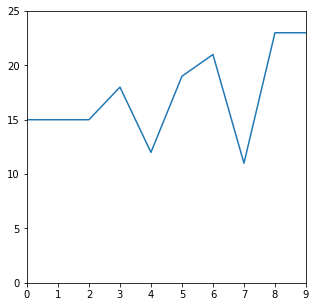

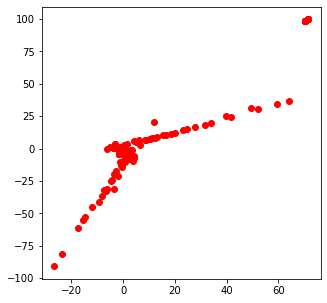

In [194]:
plt.figure(figsize=(5, 5))
plt.plot(motif_max_list)
plt.xlim((0,9))
plt.ylim((0,25))
plt.show()

plt.figure(figsize=(5, 5))
for x in status_list:
    plt.scatter(x[0], x[1], c='red')
plt.show()